# Grama Model Building

*Purpose*: 


## Setup


In [25]:
import grama as gr
import numpy as np
import pandas as pd
DF = gr.Intention()

# Useful Programming Concepts

### TODO


## Lambda functions


### __q1__ Implement a `lambda` function

Use the `lambda` syntax to implement the following function:

$$f(x) = x + 1$$


In [2]:
# TASK: Create a lambda function to implement the function above
# task-begin
fcn = None
# task-end
# solution-begin
fcn = lambda x: x + 1
# solution-end

# Use the following to check your work
assert \
    fcn(1) == 2, \
    "Incorrect value"

print("Success!")

Success!


## Working with DataFrames

### TODO


In [3]:
# NOTE: No need to edit; recall that gr.df_make(...)
# helps us construct DataFrames
gr.df_make(
    x=[1, 2, 3],
    y=["a", "b", "c"],
    z="recycled value",
)

,x,y,z
0,1,a,recycled value
1,2,b,recycled value
2,3,c,recycled value


### __q2__ Functions on DataFrames

Use the `lambda` syntax to implement the following function:

$$y(x) = x + 1$$

Make sure your lambda function takes a DataFrame as an argument, and returns a DataFrame as an output.

In [10]:
# TASK: Create a lambda function based on DataFrames
# task-begin
fcn_df = None
# task-end
# solution-begin
fcn_df = lambda df: gr.df_make(y=df.x + 1)
# solution-end

# NOTE: Use the following to check your work
df_res = fcn_df(gr.df_make(x=[0, 1]))
df_out = gr.df_make(y=[1, 2])

assert \
    isinstance(df_res, pd.DataFrame), \
    "Output must be DataFrame"

assert \
    gr.df_equal(df_res, df_out), \
    "Incorrect output"

print("Success!")

Success!


# Constructing Grama Models

### TODO

(Reminder: Compositions)


### Add a function

### TODO

`gr.cp_vec_function()`


### __q3__ Add a function to a model

Add a function to `md_basic` that provides the output `y = x + 1`.


In [15]:
# TASK: Finish implementing the model
md_basic = (
    gr.Model("Basic model")
# solution-begin
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=df.x + 1
        ),
        var=["x"],
        out=["y"],
    )
# solution-end
)

# NOTE: Use the following to check your work
df_res = (
    md_basic
    >> gr.ev_df(gr.df_make(x=0))
)
df_out = gr.df_make(x=0, y=1)

assert \
    set(md_basic.var) == {"x"}, \
    "md_basic has wrong variables"
    
assert \
    set(md_basic.out) == {"y"}, \
    "md_basic has wrong outputs"

assert \
    gr.df_equal(df_res, df_out), \
    "md_basic function incorrect"
    
print("Success!")

Success!


### Add bounds

`gr.cp_bounds()`


### __q4__ Add bounds to a model

For the following model, add bounds $0 \leq x_1 \leq 1$ and $0 \leq x_2 \leq 1$.


In [22]:
# TASK: Finish implementing the model
md_bounded = (
    gr.Model("Bounded input")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=gr.sin(df.x1) + gr.sin(df.x2)**2
        ),
        var=["x1", "x2"],
        out=["y"],
    )
# solution-begin
    >> gr.cp_bounds(
        x1=(0, 1),
        x2=(0, 1),
    )
# solution-end
)

# NOTE: Use the following to check your work
assert \
    (md_bounded.domain.bounds["x1"][0] == 0) and \
    (md_bounded.domain.bounds["x1"][1] == 1) and \
    (md_bounded.domain.bounds["x2"][0] == 0) and \
    (md_bounded.domain.bounds["x2"][1] == 1), \
    "md_bounded bounds incorrect"
    
print("Success!")

Success!


# Checking models

### TODO


### __q5__ Create a grid of values


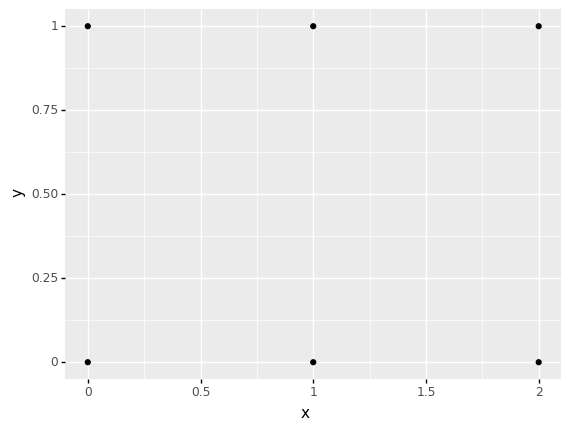

<ggplot: (8789753875908)>

In [24]:
# TASK:
(
    # TODO: Try modifying the following code; see how
    # the results change
    gr.df_grid(
        x=[0, 1, 2],
        y=[0, 1],
    )
    
    # NOTE: No need to edit the following
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point()
)

## Model sanity checks

### TODO


$$\begin{aligned}f(x, y) &= x + y^2 \,|\, x < 1/2 \\ & = 1 - x + y^2 \,|\, x \geq 1/2 \end{aligned}$$


In [33]:
# NOTE: No need to edit; you'll explore this model in the next task
md_error = (
    gr.Model("Error example")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=(df.x + df.y**2) * (df.x < 0.5)
             +(1 + df.x + df.y**2) * (df.x >= 0.5)
        ),
        var=["x", "y"],
        out=["f"],
    )
    >> gr.cp_bounds(
        x=(0, 1),
        y=(0, 1),
    )
)
md_error

model: Error example

  inputs:
    var_det:
      x: [0, 1]
      y: [0, 1]

    var_rand:

    copula:
      None

  functions:
      f0: ['x', 'y'] -> ['f']

### __q6__ Find the error


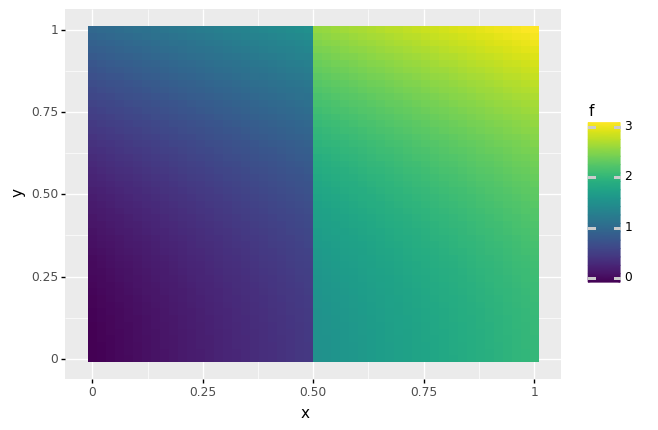

<ggplot: (8789754297835)>

In [32]:
# TASK: Explore the model's behavior to find the implementation error
(
    md_error
    >> gr.ev_df(
# task-begin
        # Define an input DataFrame to evaluate the model
# task-end
# solution-begin
        gr.df_grid(
            x=np.linspace(0, 1),
            y=np.linspace(0, 1),
        )
# solution-end
    )
    # NOTE: No need to edit; use this to visualize your results
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_tile(gr.aes(fill="f"))
)